# Topographies

In this notebook we examine the spacial distribution of spectral features on the scalp. We do this by plotting heatmaps. We also demonstrate the spacial correlation between TBR and exponent as well as ABR and alpha power.

In [1]:
import csv

import sys
sys.path.append('../bratios')

import numpy as np
from numpy.linalg import LinAlgError

import pandas as pd
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt
from matplotlib import cm, colors, colorbar, rcParams

import mne

from fooof import FOOOF, FOOOFGroup

from ratios import *
from analysis import *
from plot import *
from settings import *

In [2]:
# Open CSV
data = pd.read_csv("../dat/ChildMind/MIPDB_PublicFile.csv")
df = pd.read_csv("../dat/ChildMind/spectral_measures_dataframe.csv")

In [3]:
# Read in list of channel names that are kept in reduced 111 montage
with open('../dat/ChildMind/chans111.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    ch_labels = list(reader)[0]
    
# Read montage, reduced to 111 channel selection
montage = mne.channels.read_montage('GSN-HydroCel-129', ch_names=ch_labels)

# Create the info structure needed by MNE
info = mne.create_info(ch_labels, 500, 'eeg', montage)

# Create the MNE Raw data object
raw = mne.io.RawArray(np.zeros([111, 1]), info, verbose=False)

Below we calculate the mean of relevant spectral features across subjects for each channel.

In [15]:
exps = np.zeros(NUM_CHAN)
alpha_pw = np.zeros(NUM_CHAN)
tbrs = np.zeros(NUM_CHAN)
abrs = np.zeros(NUM_CHAN)

for chan in range(NUM_CHAN):
    exps[chan] = df[df.Chan_ID == chan].Exp.mean()
    alpha_pw[chan] = df[df.Chan_ID == chan].Alpha_PW.mean()
    tbrs[chan] = df[df.Chan_ID == chan].TBR.mean()
    abrs[chan] = df[df.Chan_ID == chan].ABR.mean()
        
params = [exps, alpha_pw, tbrs, abrs]
str_params = ["exps","alpha_pw",'tbrs','abrs']

## Spacial Topographies of Exponent and TBR

Below we plot the spacial topographies for the spectral features and show how similar these distributions are by calculating the spearman correlation.

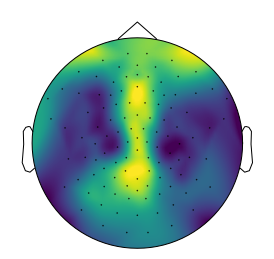

Text(0.5, 1.0, 'TBR')

In [16]:
# Topography of TBRs
fig, ax = plt.subplots();
mne.viz.plot_topomap(tbrs, raw.info, vmin=min(tbrs), vmax=max(tbrs), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("TBR")

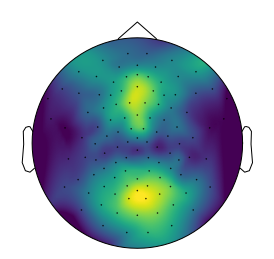

Text(0.5, 1.0, 'Exp')

In [17]:
# Topography of Exp
fig, ax = plt.subplots();
mne.viz.plot_topomap(exps, raw.info, vmin=min(exps), vmax=max(exps), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("Exp")

In [18]:
# Calculate correlation between spatial topographies\n
print("Correlation between EXP and TBR",spearmanr(tbrs, exps))

Correlation between EXP and TBR SpearmanrResult(correlation=0.6506669006669006, pvalue=1.0782010376222385e-14)


## Spacial Topographies of Alpha PW and ABR

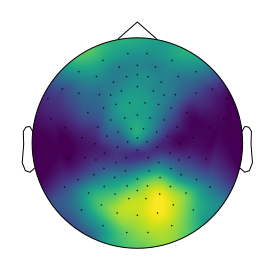

Text(0.5, 1.0, 'ABR')

In [19]:
# Topography of TBRs
fig, ax = plt.subplots();
mne.viz.plot_topomap(abrs, raw.info, vmin=min(abrs), vmax=max(abrs), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("ABR")

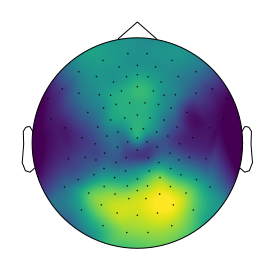

Text(0.5, 1.0, 'alpha_pw')

In [20]:
# Topography of Exp
fig, ax = plt.subplots();
mne.viz.plot_topomap(alpha_pw, raw.info, vmin=min(alpha_pw), vmax=max(alpha_pw), cmap=cm.viridis, contours=0, axes=ax);
ax.set_title("alpha_pw")

In [21]:
# Calculate correlation between spatial topographies\n
print(spearmanr(abrs, alpha_pw))

SpearmanrResult(correlation=0.967093717093717, pvalue=1.2637267382388887e-66)
